In [403]:
#merge csv's into a single data obj
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

data1 = pd.read_csv("menu UTD data.csv")
data2 = pd.read_csv("menu SF data.csv")
data3 = pd.read_csv("menu NY data.csv", encoding='iso-8859-1')

In [404]:
# concatenate and validate
data1.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)
data3.reset_index(drop=True, inplace=True)

#turn NaN into 0's
data = pd.concat([data1, data2, data3], axis = 0)
data = data.fillna(int(0))

C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [405]:
# turning cuisines and foodTypes into categorical
data['cuisines'] = data['cuisines'].astype('category')
data['foodTypes'] = data['foodTypes'].astype('category')

In [406]:
# turn factors into numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.loc[:, 'cuisines'] = le.fit_transform(data.loc[:, 'cuisines'])

In [407]:
# prepare training and test data
from sklearn.model_selection import train_test_split
X = data.drop(['foodTypes', 'apiKey', 'basePrice', 'description', 'name', 'restaurant'], axis=1)
y = data['foodTypes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [408]:
# Preform feature selection
from sklearn import preprocessing
sel = SelectFromModel(RandomForestClassifier(n_estimators = 200))
print(X_train.shape)
print(y_train.shape)
sel.fit(X_train, y_train)

(2225, 1631)
(2225,)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [409]:
# Show the selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

296

In [410]:
print(selected_feat)
print(sel.threshold_)
print('cuisines' in selected_feat)      #basic sanity check --> cuisine should be a very important feature

Index(['%', 'Advance', 'Beef', 'Bread', 'CAL', 'Chicken', 'Choice', 'Corn',
       'Crepe', 'Fish',
       ...
       'vegetables', 'vinaigrette', 'vinegar', 'walnuts', 'wheat', 'wings',
       'wood', 'yogurt', 'zucchini', '|'],
      dtype='object', length=296)
0.0006131207847946045
True


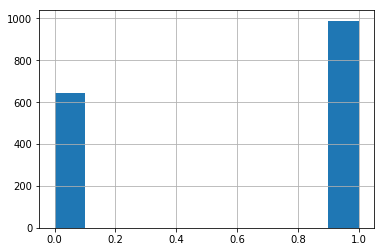

In [411]:
# Visualize selected features
from sklearn.preprocessing import normalize
norm_data = normalize([sel.estimator_.feature_importances_], axis = 0).ravel()
pd.Series(norm_data).hist()

In [412]:
# change data to have only important features, and then fit a new model with it
X_imp_train = sel.transform(X_train)
X_imp_test = sel.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [413]:
# preform predictions with the new model
preds = rfc.predict(X_imp_test)

In [414]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, y_test)

0.6184486373165619